# Variational Circuit Map Fitting

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

C:\Users\krisw\Documents\ModelNISQ\notebooks\experiments\../../src_tf\spam.py:111: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if init is "random":
C:\Users\krisw\Documents\ModelNISQ\notebooks\experiments\../../src_tf\spam.py:115: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif init is "ideal":
C:\Users\krisw\Documents\ModelNISQ\notebooks\experiments\../../src_tf\spam.py:125: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if povm is "random":
C:\Users\krisw\Documents\ModelNISQ\notebooks\experiments\../../src_tf\spam.py:133: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif povm is "ideal":


In [2]:
def spectrum_pipeline(spam_model, kraus_model, data, num_iter_spam, num_iter_map, N=None):
    d = spam_model.d
    kraus_model.spam = spam_model
    inputs_spam, targets_spam, inputs_map, targets_map = data
    
    spam_model.pretrain(targets = [init_ideal(d), povm_ideal(d)],
                        num_iter = 300,
                        verbose = False,
                       )
    
    spam_model.train(inputs = inputs_spam,
                     targets = targets_spam,
                     num_iter = num_iter_spam,
                     verbose = False,
                    )
    
    model = ModelQuantumMap(
                            channel = kraus_model,
                            loss_function = ProbabilityMSE(),
                            optimizer = tf.optimizers.Adam(learning_rate=0.01),
                           )

    model.train(inputs = inputs_map,
                targets = targets_map,
                num_iter = num_iter_map,
                )
    
    spectrum = channel_spectrum(kraus_model)

    t = np.linspace(0, 2*np.pi, 100)
    circle = [np.sin(t), np.cos(t)]
    
    return spectrum, circle, model


## Three Qubit 

## Delay

In [3]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_noDelay_manila.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum1, circle, model1 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            N = 500
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0014378532788345657


  0%|          | 0/2000 [00:00<?, ?it/s]

Step:0, train: 0.4615479903087137
Step:1, train: 0.45762693669980753
Step:2, train: 0.45363704396652643
Step:3, train: 0.4496117692389157
Step:4, train: 0.4455627503305053
Step:5, train: 0.44149571461706255
Step:6, train: 0.4374140044317631
Step:7, train: 0.43331973229376725
Step:8, train: 0.42921417263753564
Step:9, train: 0.4250980628288509
Step:10, train: 0.4209717165087695
Step:11, train: 0.41683515120123477
Step:12, train: 0.41268815380689117
Step:13, train: 0.408530334536396
Step:14, train: 0.40436119272375753
Step:15, train: 0.4001801316855143
Step:16, train: 0.3959865029994941
Step:17, train: 0.3917796148178884
Step:18, train: 0.3875587736278156
Step:19, train: 0.3833232974318779
Step:20, train: 0.37907253076625413
Step:21, train: 0.3748058653587038
Step:22, train: 0.370522757062555
Step:23, train: 0.3662227203383686
Step:24, train: 0.3619053448859423
Step:25, train: 0.35757028775525046
Step:26, train: 0.35321728518159257
Step:27, train: 0.3488461597327859
Step:28, train: 0.344

Step:225, train: 0.023017888759315513
Step:226, train: 0.022991054456275927
Step:227, train: 0.022964712554366443
Step:228, train: 0.022938847117348695
Step:229, train: 0.022913442825664133
Step:230, train: 0.022888485073212644
Step:231, train: 0.022863959813361187
Step:232, train: 0.02283985356841653
Step:233, train: 0.022816153409043773
Step:234, train: 0.022792846942212824
Step:235, train: 0.02276992228133482
Step:236, train: 0.022747367984347015
Step:237, train: 0.02272517312426843
Step:238, train: 0.022703327162058112
Step:239, train: 0.02268181998532354
Step:240, train: 0.022660641899035303
Step:241, train: 0.02263978358021042
Step:242, train: 0.022619236055304862
Step:243, train: 0.022598990712140884
Step:244, train: 0.022579039283259963
Step:245, train: 0.0225593738015614
Step:246, train: 0.02253998662243486
Step:247, train: 0.022520870334887
Step:248, train: 0.02250201789100265
Step:249, train: 0.022483422444240328
Step:250, train: 0.02246507744055153
Step:251, train: 0.022446

Step:443, train: 0.02080611325849352
Step:444, train: 0.020801869304563896
Step:445, train: 0.02079764749193882
Step:446, train: 0.02079344767235535
Step:447, train: 0.0207892696765741
Step:448, train: 0.02078511335005591
Step:449, train: 0.02078097854502888
Step:450, train: 0.02077686509748123
Step:451, train: 0.020772772860224182
Step:452, train: 0.020768701685180125
Step:453, train: 0.02076465141484354
Step:454, train: 0.020760621909982853
Step:455, train: 0.020756613024301644
Step:456, train: 0.020752624608153428
Step:457, train: 0.020748656522259684
Step:458, train: 0.020744708619887187
Step:459, train: 0.020740780760733154
Step:460, train: 0.020736872813194213
Step:461, train: 0.020732984627106578
Step:462, train: 0.02072911607706512
Step:463, train: 0.020725267018088744
Step:464, train: 0.02072143732533206
Step:465, train: 0.020717626864658424
Step:466, train: 0.020713835503582034
Step:467, train: 0.020710063105061658
Step:468, train: 0.02070630955138111
Step:469, train: 0.02070

Step:661, train: 0.02022660712923722
Step:662, train: 0.020225002718824683
Step:663, train: 0.02022340461737908
Step:664, train: 0.020221812788452233
Step:665, train: 0.020220227207750067
Step:666, train: 0.020218647842490833
Step:667, train: 0.020217074668073425
Step:668, train: 0.020215507652301526
Step:669, train: 0.020213946769545917
Step:670, train: 0.020212391986677552
Step:671, train: 0.02021084327734608
Step:672, train: 0.020209300610135743
Step:673, train: 0.020207763961921147
Step:674, train: 0.02020623329956932
Step:675, train: 0.020204708596382983
Step:676, train: 0.0202031898285929
Step:677, train: 0.020201676963050502
Step:678, train: 0.0202001699747487
Step:679, train: 0.020198668834484988
Step:680, train: 0.020197173516422248
Step:681, train: 0.020195683993594653
Step:682, train: 0.020194200237395085
Step:683, train: 0.020192722224834793
Step:684, train: 0.020191249925385207
Step:685, train: 0.02018978331374297
Step:686, train: 0.020188322364259968
Step:687, train: 0.02

Step:879, train: 0.019987529823481596
Step:880, train: 0.01998680975290806
Step:881, train: 0.01998609217783501
Step:882, train: 0.019985377089316567
Step:883, train: 0.019984664477696944
Step:884, train: 0.019983954334631328
Step:885, train: 0.019983246648268872
Step:886, train: 0.01998254140887385
Step:887, train: 0.01998183860999757
Step:888, train: 0.01998113824047884
Step:889, train: 0.01998044029029855
Step:890, train: 0.019979744750089123
Step:891, train: 0.019979051610199097
Step:892, train: 0.01997836086287005
Step:893, train: 0.01997767249815077
Step:894, train: 0.01997698650878161
Step:895, train: 0.019976302881483707
Step:896, train: 0.019975621611518286
Step:897, train: 0.019974942688843693
Step:898, train: 0.019974266099903385
Step:899, train: 0.019973591841785338
Step:900, train: 0.019972919902267117
Step:901, train: 0.019972250276453968
Step:902, train: 0.01997158294925258
Step:903, train: 0.019970917915137398
Step:904, train: 0.019970255165721658
Step:905, train: 0.019

Step:1095, train: 0.019877049894392842
Step:1096, train: 0.019876700151295352
Step:1097, train: 0.01987635153574057
Step:1098, train: 0.01987600404434346
Step:1099, train: 0.019875657674693
Step:1100, train: 0.019875312421637783
Step:1101, train: 0.019874968281625726
Step:1102, train: 0.0198746252519521
Step:1103, train: 0.019874283325324774
Step:1104, train: 0.01987394250121593
Step:1105, train: 0.01987360277449744
Step:1106, train: 0.01987326414017281
Step:1107, train: 0.0198729265946869
Step:1108, train: 0.01987259013760313
Step:1109, train: 0.01987225476247862
Step:1110, train: 0.01987192046719234
Step:1111, train: 0.019871587245605046
Step:1112, train: 0.019871255095043464
Step:1113, train: 0.019870924010551766
Step:1114, train: 0.01987059399081727
Step:1115, train: 0.019870265030392138
Step:1116, train: 0.01986993712555512
Step:1117, train: 0.01986961027397909
Step:1118, train: 0.019869284470938373
Step:1119, train: 0.01986895971497235
Step:1120, train: 0.019868635999866584
Step:

Step:1308, train: 0.019822843697766022
Step:1309, train: 0.019822664882392985
Step:1310, train: 0.019822486616277453
Step:1311, train: 0.01982230889712734
Step:1312, train: 0.019822131724027466
Step:1313, train: 0.01982195509402271
Step:1314, train: 0.019821779006054308
Step:1315, train: 0.019821603458817196
Step:1316, train: 0.019821428449860592
Step:1317, train: 0.01982125397683741
Step:1318, train: 0.019821080038482746
Step:1319, train: 0.019820906633544362
Step:1320, train: 0.019820733759753233
Step:1321, train: 0.019820561415344603
Step:1322, train: 0.01982038959995698
Step:1323, train: 0.019820218309067477
Step:1324, train: 0.019820047543168955
Step:1325, train: 0.01981987729934918
Step:1326, train: 0.019819707577218588
Step:1327, train: 0.019819538373625
Step:1328, train: 0.019819369687703866
Step:1329, train: 0.019819201518001293
Step:1330, train: 0.019819033862682956
Step:1331, train: 0.019818866719390076
Step:1332, train: 0.019818700086758984
Step:1333, train: 0.0198185339634

Step:1521, train: 0.019794751160741638
Step:1522, train: 0.01979465703728902
Step:1523, train: 0.01979456319123263
Step:1524, train: 0.019794469622973487
Step:1525, train: 0.01979437633004924
Step:1526, train: 0.01979428331237931
Step:1527, train: 0.019794190568662925
Step:1528, train: 0.019794098098789664
Step:1529, train: 0.01979400590085411
Step:1530, train: 0.01979391397494487
Step:1531, train: 0.01979382231998007
Step:1532, train: 0.01979373093434619
Step:1533, train: 0.019793639818445525
Step:1534, train: 0.019793548970268138
Step:1535, train: 0.019793458389883826
Step:1536, train: 0.019793368075966097
Step:1537, train: 0.019793278027960513
Step:1538, train: 0.01979318824514412
Step:1539, train: 0.019793098725955555
Step:1540, train: 0.019793009470595223
Step:1541, train: 0.019792920477106107
Step:1542, train: 0.019792831745651177
Step:1543, train: 0.01979274327475966
Step:1544, train: 0.019792655064243922
Step:1545, train: 0.019792567112819928
Step:1546, train: 0.019792479419544

Step:1733, train: 0.019779852664083167
Step:1734, train: 0.019779801771310206
Step:1735, train: 0.019779751023511188
Step:1736, train: 0.019779700419648626
Step:1737, train: 0.019779649959738917
Step:1738, train: 0.019779599642863164
Step:1739, train: 0.019779549468738028
Step:1740, train: 0.019779499437731694
Step:1741, train: 0.019779449547949142
Step:1742, train: 0.019779399800214245
Step:1743, train: 0.019779350193647884
Step:1744, train: 0.019779300727710083
Step:1745, train: 0.01977925140193392
Step:1746, train: 0.019779202216709993
Step:1747, train: 0.0197791531707308
Step:1748, train: 0.01977910426361891
Step:1749, train: 0.01977905549568377
Step:1750, train: 0.019779006865236218
Step:1751, train: 0.019778958373060245
Step:1752, train: 0.0197789100185825
Step:1753, train: 0.019778861800343488
Step:1754, train: 0.019778813719200372
Step:1755, train: 0.019778765774341484
Step:1756, train: 0.01977871796500313
Step:1757, train: 0.01977867029049908
Step:1758, train: 0.01977862275134

Step:1946, train: 0.01977168559375171
Step:1947, train: 0.01977165750884115
Step:1948, train: 0.019771629500894648
Step:1949, train: 0.0197716015693858
Step:1950, train: 0.019771573713709092
Step:1951, train: 0.019771545934025542
Step:1952, train: 0.019771518229934944
Step:1953, train: 0.01977149060179201
Step:1954, train: 0.01977146304919613
Step:1955, train: 0.019771435571534907
Step:1956, train: 0.019771408169031394
Step:1957, train: 0.019771380840741405
Step:1958, train: 0.01977135358697189
Step:1959, train: 0.019771326407838363
Step:1960, train: 0.019771299302535503
Step:1961, train: 0.019771272270778014
Step:1962, train: 0.019771245312788076
Step:1963, train: 0.019771218428155535
Step:1964, train: 0.019771191616613
Step:1965, train: 0.019771164878554646
Step:1966, train: 0.019771138212958204
Step:1967, train: 0.019771111620106252
Step:1968, train: 0.019771085098996596
Step:1969, train: 0.01977105865039082
Step:1970, train: 0.019771032273792694
Step:1971, train: 0.0197710059682746

In [5]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_2point5usDelay_manila.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum2, circle, model2 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            N = 500
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.001360922435332573


  0%|          | 0/2000 [00:00<?, ?it/s]

Step:0, train: 0.34367709608346825
Step:1, train: 0.34017728566506705
Step:2, train: 0.3366308266646572
Step:3, train: 0.33307096923347546
Step:4, train: 0.32950904490662714
Step:5, train: 0.3259503710526334
Step:6, train: 0.32239784751032446
Step:7, train: 0.3188531571180403
Step:8, train: 0.3153171586159355
Step:9, train: 0.3117901365219728
Step:10, train: 0.30827191005668386
Step:11, train: 0.3047619726352857
Step:12, train: 0.301259586305878
Step:13, train: 0.2977638532938997
Step:14, train: 0.29427379273106724
Step:15, train: 0.29078836762913973
Step:16, train: 0.2873065290852245
Step:17, train: 0.2838272223590912
Step:18, train: 0.28034941313973805
Step:19, train: 0.2768720910717962
Step:20, train: 0.27339427464380034
Step:21, train: 0.2699150275231215
Step:22, train: 0.266433475544263
Step:23, train: 0.2629488081872609
Step:24, train: 0.25946029840896245
Step:25, train: 0.2559673029496903
Step:26, train: 0.25246927508958517
Step:27, train: 0.2489657726892527
Step:28, train: 0.24

Step:224, train: 0.016971873884070683
Step:225, train: 0.016950007808560347
Step:226, train: 0.01692840014552527
Step:227, train: 0.016907045468289444
Step:228, train: 0.016885938589195508
Step:229, train: 0.01686507445892306
Step:230, train: 0.0168444481955744
Step:231, train: 0.01682405507067135
Step:232, train: 0.01680389054688705
Step:233, train: 0.016783950197880163
Step:234, train: 0.016764229755707703
Step:235, train: 0.016744725075218164
Step:236, train: 0.01672543213162968
Step:237, train: 0.01670634702896667
Step:238, train: 0.016687465996850153
Step:239, train: 0.016668785357596704
Step:240, train: 0.016650301544648888
Step:241, train: 0.01663201111794752
Step:242, train: 0.016613910712830072
Step:243, train: 0.016595997071200977
Step:244, train: 0.016578267010563367
Step:245, train: 0.016560717452230592
Step:246, train: 0.016543345392175564
Step:247, train: 0.01652614791724643
Step:248, train: 0.01650912217014568
Step:249, train: 0.016492265392359297
Step:250, train: 0.0164

Step:442, train: 0.01485330554101294
Step:443, train: 0.014849210069741171
Step:444, train: 0.014845138444288966
Step:445, train: 0.014841090494787362
Step:446, train: 0.014837066029008071
Step:447, train: 0.014833064878515996
Step:448, train: 0.014829086866957216
Step:449, train: 0.014825131827569091
Step:450, train: 0.014821199582468816
Step:451, train: 0.014817289965661805
Step:452, train: 0.014813402817146682
Step:453, train: 0.01480953796181302
Step:454, train: 0.014805695243822203
Step:455, train: 0.014801874493831304
Step:456, train: 0.01479807554935405
Step:457, train: 0.01479429825090495
Step:458, train: 0.014790542441650229
Step:459, train: 0.014786807962773395
Step:460, train: 0.0147830946575413
Step:461, train: 0.01477940237274932
Step:462, train: 0.01477573095968543
Step:463, train: 0.014772080259141097
Step:464, train: 0.014768450125405938
Step:465, train: 0.014764840413829545
Step:466, train: 0.01476125097345387
Step:467, train: 0.01475768165504791
Step:468, train: 0.014

Step:659, train: 0.014324571050607093
Step:660, train: 0.014323197054403696
Step:661, train: 0.014321829134619395
Step:662, train: 0.014320467258828143
Step:663, train: 0.014319111393125557
Step:664, train: 0.014317761510485834
Step:665, train: 0.014316417573621516
Step:666, train: 0.014315079550966352
Step:667, train: 0.014313747413146845
Step:668, train: 0.014312421128263331
Step:669, train: 0.014311100669271267
Step:670, train: 0.014309786001274825
Step:671, train: 0.014308477093898053
Step:672, train: 0.01430717391884686
Step:673, train: 0.014305876446772819
Step:674, train: 0.01430458464311497
Step:675, train: 0.014303298482503444
Step:676, train: 0.01430201793491497
Step:677, train: 0.01430074297154619
Step:678, train: 0.014299473561802488
Step:679, train: 0.014298209675052673
Step:680, train: 0.014296951286919853
Step:681, train: 0.014295698363644905
Step:682, train: 0.014294450881470782
Step:683, train: 0.014293208811673995
Step:684, train: 0.014291972122124998
Step:685, train:

Step:876, train: 0.014128652829176266
Step:877, train: 0.014128086710498497
Step:878, train: 0.014127522740375804
Step:879, train: 0.014126960911002824
Step:880, train: 0.014126401211125272
Step:881, train: 0.014125843631648585
Step:882, train: 0.014125288163668093
Step:883, train: 0.014124734798115383
Step:884, train: 0.014124183524707087
Step:885, train: 0.014123634335970905
Step:886, train: 0.014123087222185075
Step:887, train: 0.01412254217354657
Step:888, train: 0.014121999180618988
Step:889, train: 0.014121458239571798
Step:890, train: 0.014120919337909637
Step:891, train: 0.014120382466497753
Step:892, train: 0.01411984761612866
Step:893, train: 0.014119314780620926
Step:894, train: 0.014118783949473258
Step:895, train: 0.014118255113393914
Step:896, train: 0.014117728264968175
Step:897, train: 0.014117203393511973
Step:898, train: 0.014116680492779043
Step:899, train: 0.01411615955275097
Step:900, train: 0.014115640566241061
Step:901, train: 0.01411512352514164
Step:902, train:

Step:1091, train: 0.014044352500485848
Step:1092, train: 0.01404409159972564
Step:1093, train: 0.0140438315917653
Step:1094, train: 0.014043572473136008
Step:1095, train: 0.014043314241157864
Step:1096, train: 0.014043056892642557
Step:1097, train: 0.014042800421489553
Step:1098, train: 0.01404254482696672
Step:1099, train: 0.014042290104477266
Step:1100, train: 0.014042036250824242
Step:1101, train: 0.014041783263136941
Step:1102, train: 0.01404153113852626
Step:1103, train: 0.01404127987239599
Step:1104, train: 0.014041029460963613
Step:1105, train: 0.0140407799030151
Step:1106, train: 0.01404053119509105
Step:1107, train: 0.014040283332630405
Step:1108, train: 0.014040036314172551
Step:1109, train: 0.014039790134680988
Step:1110, train: 0.01403954479248592
Step:1111, train: 0.014039300283068282
Step:1112, train: 0.01403905660379161
Step:1113, train: 0.014038813752176365
Step:1114, train: 0.014038571724082882
Step:1115, train: 0.014038330516466505
Step:1116, train: 0.0140380901266236

Step:1303, train: 0.01400465867033146
Step:1304, train: 0.014004528922311818
Step:1305, train: 0.014004399584796405
Step:1306, train: 0.01400427065843603
Step:1307, train: 0.014004142140447547
Step:1308, train: 0.014004014028926697
Step:1309, train: 0.014003886323962154
Step:1310, train: 0.014003759023635374
Step:1311, train: 0.014003632126259965
Step:1312, train: 0.014003505629795363
Step:1313, train: 0.014003379533748245
Step:1314, train: 0.014003253837583579
Step:1315, train: 0.014003128538419417
Step:1316, train: 0.01400300363467126
Step:1317, train: 0.014002879126376882
Step:1318, train: 0.014002755010914112
Step:1319, train: 0.014002631287884097
Step:1320, train: 0.01400250795545797
Step:1321, train: 0.014002385011967936
Step:1322, train: 0.014002262456784789
Step:1323, train: 0.014002140287542326
Step:1324, train: 0.014002018503955932
Step:1325, train: 0.014001897104296095
Step:1326, train: 0.01400177608739507
Step:1327, train: 0.014001655451658473
Step:1328, train: 0.0140015351

Step:1515, train: 0.013984500511250593
Step:1516, train: 0.013984433065810086
Step:1517, train: 0.013984365822955303
Step:1518, train: 0.013984298782180885
Step:1519, train: 0.013984231942059847
Step:1520, train: 0.013984165302395423
Step:1521, train: 0.013984098862598859
Step:1522, train: 0.013984032622043384
Step:1523, train: 0.013983966579988964
Step:1524, train: 0.013983900736357972
Step:1525, train: 0.013983835089571323
Step:1526, train: 0.01398376963936277
Step:1527, train: 0.013983704385360238
Step:1528, train: 0.01398363932677389
Step:1529, train: 0.013983574463182177
Step:1530, train: 0.013983509793806715
Step:1531, train: 0.013983445317950451
Step:1532, train: 0.013983381034552503
Step:1533, train: 0.013983316943998047
Step:1534, train: 0.013983253044958763
Step:1535, train: 0.013983189337163566
Step:1536, train: 0.013983125820002808
Step:1537, train: 0.013983062491970077
Step:1538, train: 0.013982999353897194
Step:1539, train: 0.013982936403817259
Step:1540, train: 0.0139828

Step:1727, train: 0.013973871303231997
Step:1728, train: 0.013973835178341533
Step:1729, train: 0.013973799157447064
Step:1730, train: 0.01397376324043249
Step:1731, train: 0.013973727426893815
Step:1732, train: 0.013973691716699595
Step:1733, train: 0.013973656109740204
Step:1734, train: 0.013973620605242964
Step:1735, train: 0.01397358520310399
Step:1736, train: 0.013973549902990285
Step:1737, train: 0.013973514704590049
Step:1738, train: 0.013973479607529416
Step:1739, train: 0.01397344461180006
Step:1740, train: 0.013973409716857085
Step:1741, train: 0.013973374922358815
Step:1742, train: 0.01397334022833842
Step:1743, train: 0.013973305633685687
Step:1744, train: 0.013973271138760358
Step:1745, train: 0.013973236743441227
Step:1746, train: 0.013973202447041953
Step:1747, train: 0.013973168249215776
Step:1748, train: 0.013973134149563233
Step:1749, train: 0.013973100148272338
Step:1750, train: 0.013973066244701411
Step:1751, train: 0.013973032438711164
Step:1752, train: 0.013972998

Step:1939, train: 0.013968120490910063
Step:1940, train: 0.013968100720039093
Step:1941, train: 0.013968081004378947
Step:1942, train: 0.013968061343853758
Step:1943, train: 0.013968041738187461
Step:1944, train: 0.01396802218735337
Step:1945, train: 0.01396800269105886
Step:1946, train: 0.013967983249233908
Step:1947, train: 0.013967963861802296
Step:1948, train: 0.013967944528315167
Step:1949, train: 0.013967925248987573
Step:1950, train: 0.013967906023042232
Step:1951, train: 0.013967886851058913
Step:1952, train: 0.013967867732408592
Step:1953, train: 0.013967848667348473
Step:1954, train: 0.013967829655296636
Step:1955, train: 0.013967810696169872
Step:1956, train: 0.013967791789879506
Step:1957, train: 0.013967772936173732
Step:1958, train: 0.013967754135413636
Step:1959, train: 0.013967735386731312
Step:1960, train: 0.01396771669045379
Step:1961, train: 0.013967698046195423
Step:1962, train: 0.013967679453990186
Step:1963, train: 0.013967660913548884
Step:1964, train: 0.01396764

In [6]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_5usDelay_manila.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum3, circle, model3 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            N = 500
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0013832498906565887


  0%|          | 0/2000 [00:00<?, ?it/s]

Step:0, train: 0.21424700949423908
Step:1, train: 0.21125352923056384
Step:2, train: 0.20823305773458797
Step:3, train: 0.2052180639868945
Step:4, train: 0.20221997116622148
Step:5, train: 0.19924439101445973
Step:6, train: 0.19629446021889918
Step:7, train: 0.19337199340501066
Step:8, train: 0.19047794542351806
Step:9, train: 0.1876127314635822
Step:10, train: 0.18477636642304587
Step:11, train: 0.18196857718022522
Step:12, train: 0.17918885966330866
Step:13, train: 0.17643653037119258
Step:14, train: 0.17371079309826834
Step:15, train: 0.1710107728330102
Step:16, train: 0.1683355666465104
Step:17, train: 0.16568426074427411
Step:18, train: 0.16305596185358492
Step:19, train: 0.1604498061156903
Step:20, train: 0.15786496543871315
Step:21, train: 0.15530065915766822
Step:22, train: 0.15275616185632157
Step:23, train: 0.15023080043509837
Step:24, train: 0.1477239632690879
Step:25, train: 0.14523509655197064
Step:26, train: 0.14276370944147032
Step:27, train: 0.14030937869419138
Step:28,

Step:223, train: 0.019493510220315927
Step:224, train: 0.01947266883302634
Step:225, train: 0.01945210634595125
Step:226, train: 0.019431817335880945
Step:227, train: 0.019411796519732648
Step:228, train: 0.019392038720037422
Step:229, train: 0.019372538903310893
Step:230, train: 0.0193532921604364
Step:231, train: 0.019334293683220004
Step:232, train: 0.01931553879339227
Step:233, train: 0.019297022930953298
Step:234, train: 0.01927874163157378
Step:235, train: 0.019260690535402244
Step:236, train: 0.019242865405124966
Step:237, train: 0.019225262080996515
Step:238, train: 0.019207876520263074
Step:239, train: 0.019190704765561003
Step:240, train: 0.019173742950342323
Step:241, train: 0.01915698730223503
Step:242, train: 0.019140434141819335
Step:243, train: 0.01912407985464295
Step:244, train: 0.01910792094895383
Step:245, train: 0.019091953975393112
Step:246, train: 0.019076175583362817
Step:247, train: 0.019060582491920414
Step:248, train: 0.019045171501925223
Step:249, train: 0.01

Step:442, train: 0.017666878618457962
Step:443, train: 0.017663702626633308
Step:444, train: 0.017660546009091588
Step:445, train: 0.017657408611484963
Step:446, train: 0.017654290287213173
Step:447, train: 0.017651190887749073
Step:448, train: 0.01764811026546182
Step:449, train: 0.017645048276869312
Step:450, train: 0.017642004775096073
Step:451, train: 0.017638979618424786
Step:452, train: 0.017635972667852648
Step:453, train: 0.01763298378450977
Step:454, train: 0.01763001282951912
Step:455, train: 0.01762705966556321
Step:456, train: 0.017624124157358527
Step:457, train: 0.017621206170791878
Step:458, train: 0.017618305578121187
Step:459, train: 0.017615422243770683
Step:460, train: 0.01761255603747361
Step:461, train: 0.017609706831276953
Step:462, train: 0.017606874498615435
Step:463, train: 0.017604058909277097
Step:464, train: 0.017601259945427904
Step:465, train: 0.017598477476302006
Step:466, train: 0.017595711386054126
Step:467, train: 0.01759296155176445
Step:468, train: 0

Step:660, train: 0.017266388490856044
Step:661, train: 0.017265400189996567
Step:662, train: 0.01726441664817656
Step:663, train: 0.01726343784087327
Step:664, train: 0.017262463743094068
Step:665, train: 0.017261494328632738
Step:666, train: 0.017260529570177405
Step:667, train: 0.01725956944315032
Step:668, train: 0.01725861392172629
Step:669, train: 0.017257662981463272
Step:670, train: 0.017256716597046733
Step:671, train: 0.017255774744601774
Step:672, train: 0.017254837398744283
Step:673, train: 0.017253904533515566
Step:674, train: 0.01725297612531808
Step:675, train: 0.017252052150887286
Step:676, train: 0.017251132585669307
Step:677, train: 0.017250217403149144
Step:678, train: 0.017249306583340937
Step:679, train: 0.01724840009932712
Step:680, train: 0.017247497930316172
Step:681, train: 0.017246600052238447
Step:682, train: 0.01724570644160346
Step:683, train: 0.017244817075226633
Step:684, train: 0.01724393192984265
Step:685, train: 0.017243050981982026
Step:686, train: 0.0

Step:879, train: 0.0171301954425977
Step:880, train: 0.017129829534083568
Step:881, train: 0.017129465194606033
Step:882, train: 0.017129102416335775
Step:883, train: 0.017128741192072375
Step:884, train: 0.01712838151499618
Step:885, train: 0.017128023376912722
Step:886, train: 0.017127666771042525
Step:887, train: 0.017127311689882272
Step:888, train: 0.017126958126198195
Step:889, train: 0.017126606073686535
Step:890, train: 0.017126255523973323
Step:891, train: 0.01712590647124612
Step:892, train: 0.0171255589080313
Step:893, train: 0.017125212826634508
Step:894, train: 0.017124868221742428
Step:895, train: 0.01712452508558484
Step:896, train: 0.017124183410627544
Step:897, train: 0.01712384318983233
Step:898, train: 0.017123504417482914
Step:899, train: 0.017123167086835277
Step:900, train: 0.017122831190134035
Step:901, train: 0.017122496722471306
Step:902, train: 0.017122163675263428
Step:903, train: 0.017121832042554786
Step:904, train: 0.01712150181827901
Step:905, train: 0.01

Step:1095, train: 0.017078048356128295
Step:1096, train: 0.017077897889724684
Step:1097, train: 0.017077748015903022
Step:1098, train: 0.01707759873156158
Step:1099, train: 0.01707745003408789
Step:1100, train: 0.01707730192076984
Step:1101, train: 0.01707715438997733
Step:1102, train: 0.01707700743860024
Step:1103, train: 0.0170768610642644
Step:1104, train: 0.0170767152640326
Step:1105, train: 0.017076570036584436
Step:1106, train: 0.01707642537873562
Step:1107, train: 0.01707628128835201
Step:1108, train: 0.017076137761813576
Step:1109, train: 0.017075994797785734
Step:1110, train: 0.017075852393840584
Step:1111, train: 0.017075710547326567
Step:1112, train: 0.01707556925622248
Step:1113, train: 0.017075428517565123
Step:1114, train: 0.01707528832912314
Step:1115, train: 0.017075148688862375
Step:1116, train: 0.01707500959474683
Step:1117, train: 0.017074871043663585
Step:1118, train: 0.01707473303404812
Step:1119, train: 0.017074595562811996
Step:1120, train: 0.01707445862810194
St

Step:1308, train: 0.017056137853515382
Step:1309, train: 0.017056070814089577
Step:1310, train: 0.017056004019450316
Step:1311, train: 0.01705593746777042
Step:1312, train: 0.01705587115872359
Step:1313, train: 0.017055805091536345
Step:1314, train: 0.017055739265109074
Step:1315, train: 0.017055673678477625
Step:1316, train: 0.01705560833041778
Step:1317, train: 0.017055543220512066
Step:1318, train: 0.017055478347223957
Step:1319, train: 0.01705541370993788
Step:1320, train: 0.017055349307844733
Step:1321, train: 0.01705528513924155
Step:1322, train: 0.01705522120452743
Step:1323, train: 0.017055157501542427
Step:1324, train: 0.017055094029720948
Step:1325, train: 0.01705503078875237
Step:1326, train: 0.01705496777721564
Step:1327, train: 0.01705490499391402
Step:1328, train: 0.017054842438210916
Step:1329, train: 0.017054780109337007
Step:1330, train: 0.017054718005946424
Step:1331, train: 0.017054656128003623
Step:1332, train: 0.01705459447401754
Step:1333, train: 0.017054533042900

Step:1521, train: 0.017046124916929625
Step:1522, train: 0.017046093297809217
Step:1523, train: 0.01704606178613261
Step:1524, train: 0.017046030381640435
Step:1525, train: 0.017045999083857555
Step:1526, train: 0.01704596789231202
Step:1527, train: 0.01704593680636468
Step:1528, train: 0.017045905826355196
Step:1529, train: 0.01704587495138859
Step:1530, train: 0.017045844181241054
Step:1531, train: 0.01704581351533429
Step:1532, train: 0.017045782953551403
Step:1533, train: 0.017045752495299875
Step:1534, train: 0.01704572214052986
Step:1535, train: 0.017045691888065304
Step:1536, train: 0.01704566173819573
Step:1537, train: 0.01704563169055386
Step:1538, train: 0.01704560174430996
Step:1539, train: 0.017045571899500338
Step:1540, train: 0.017045542155450476
Step:1541, train: 0.017045512512218267
Step:1542, train: 0.01704548296890299
Step:1543, train: 0.01704545352549406
Step:1544, train: 0.017045424181886676
Step:1545, train: 0.017045394937088926
Step:1546, train: 0.0170453657908370

Step:1733, train: 0.01704131107812179
Step:1734, train: 0.01704129534664085
Step:1735, train: 0.017041279665261335
Step:1736, train: 0.017041264033541018
Step:1737, train: 0.01704124845135023
Step:1738, train: 0.017041232918846547
Step:1739, train: 0.017041217435533423
Step:1740, train: 0.01704120200128395
Step:1741, train: 0.017041186615960952
Step:1742, train: 0.0170411712796048
Step:1743, train: 0.017041155991610945
Step:1744, train: 0.01704114075196633
Step:1745, train: 0.017041125560748913
Step:1746, train: 0.017041110417664308
Step:1747, train: 0.017041095322377
Step:1748, train: 0.017041080275108585
Step:1749, train: 0.017041065275276903
Step:1750, train: 0.01704105032267901
Step:1751, train: 0.01704103541748915
Step:1752, train: 0.0170410205593343
Step:1753, train: 0.017041005748138868
Step:1754, train: 0.01704099098368893
Step:1755, train: 0.0170409762658642
Step:1756, train: 0.017040961594295235
Step:1757, train: 0.01704094696913247
Step:1758, train: 0.017040932390267317
Step

Step:1946, train: 0.017038858266961384
Step:1947, train: 0.017038850097699707
Step:1948, train: 0.017038841952740885
Step:1949, train: 0.017038833831981688
Step:1950, train: 0.017038825735253504
Step:1951, train: 0.017038817662554544
Step:1952, train: 0.01703880961378353
Step:1953, train: 0.017038801589048497
Step:1954, train: 0.017038793588075345
Step:1955, train: 0.01703878561073472
Step:1956, train: 0.017038777657064456
Step:1957, train: 0.017038769726851605
Step:1958, train: 0.017038761820097507
Step:1959, train: 0.01703875393678063
Step:1960, train: 0.017038746076687414
Step:1961, train: 0.01703873823992401
Step:1962, train: 0.01703873042618562
Step:1963, train: 0.017038722635594906
Step:1964, train: 0.01703871486798278
Step:1965, train: 0.017038707123359458
Step:1966, train: 0.01703869940157694
Step:1967, train: 0.017038691702656948
Step:1968, train: 0.0170386840263669
Step:1969, train: 0.017038676372655975
Step:1970, train: 0.01703866874164507
Step:1971, train: 0.017038661133019

In [7]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_10usDelay_manila.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum4, circle, model4 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            N = 500
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0016206823638862157


  0%|          | 0/2000 [00:00<?, ?it/s]

Step:0, train: 0.1392944968517942
Step:1, train: 0.13673598516952948
Step:2, train: 0.13419599692944448
Step:3, train: 0.1317074041470392
Step:4, train: 0.12928200043974328
Step:5, train: 0.1269255363387784
Step:6, train: 0.12464108290755331
Step:7, train: 0.122430205478255
Step:8, train: 0.12029341903316547
Step:9, train: 0.11823045030972423
Step:10, train: 0.1162403648408441
Step:11, train: 0.11432169466987335
Step:12, train: 0.11247253810025598
Step:13, train: 0.11069065225699255
Step:14, train: 0.10897354547726625
Step:15, train: 0.10731854224366197
Step:16, train: 0.10572285368746348
Step:17, train: 0.10418362367740323
Step:18, train: 0.10269798242528831
Step:19, train: 0.10126308272190634
Step:20, train: 0.09987613376560454
Step:21, train: 0.0985344352763747
Step:22, train: 0.09723540451535098
Step:23, train: 0.09597659326177709
Step:24, train: 0.0947557073937615
Step:25, train: 0.09357061396067895
Step:26, train: 0.09241934817680215
Step:27, train: 0.09130011565461936
Step:28, t

Step:225, train: 0.04470510555488627
Step:226, train: 0.04468618527920545
Step:227, train: 0.0446675189959633
Step:228, train: 0.04464910212908059
Step:229, train: 0.04463093022330597
Step:230, train: 0.04461299889965096
Step:231, train: 0.04459530390426226
Step:232, train: 0.044577841068087445
Step:233, train: 0.04456060631111607
Step:234, train: 0.04454359564658796
Step:235, train: 0.04452680516088884
Step:236, train: 0.044510231063096824
Step:237, train: 0.044493869597338406
Step:238, train: 0.04447771711290167
Step:239, train: 0.0444617700631483
Step:240, train: 0.04444602494447202
Step:241, train: 0.04443047833641472
Step:242, train: 0.04441512689859361
Step:243, train: 0.044399967355585254
Step:244, train: 0.04438499651153111
Step:245, train: 0.044370211216345955
Step:246, train: 0.044355608406664825
Step:247, train: 0.044341185074476694
Step:248, train: 0.044326938285321936
Step:249, train: 0.044312865150798214
Step:250, train: 0.04429896285090766
Step:251, train: 0.044285228622

Step:445, train: 0.04313793078580757
Step:446, train: 0.043135689899347796
Step:447, train: 0.043133466150020575
Step:448, train: 0.04313125938653685
Step:449, train: 0.043129069457640105
Step:450, train: 0.04312689621624673
Step:451, train: 0.04312473951603731
Step:452, train: 0.04312259921151756
Step:453, train: 0.04312047515798516
Step:454, train: 0.04311836721272565
Step:455, train: 0.0431162752350701
Step:456, train: 0.043114199086612306
Step:457, train: 0.04311213862838968
Step:458, train: 0.043110093726039994
Step:459, train: 0.04310806424197921
Step:460, train: 0.04310605004338314
Step:461, train: 0.043104050996982834
Step:462, train: 0.04310206697383215
Step:463, train: 0.04310009784268233
Step:464, train: 0.04309814347326514
Step:465, train: 0.043096203742635716
Step:466, train: 0.04309427852371422
Step:467, train: 0.04309236769043583
Step:468, train: 0.0430904711201692
Step:469, train: 0.04308858869229127
Step:470, train: 0.04308672028358347
Step:471, train: 0.04308486577857

Step:666, train: 0.042889497425985273
Step:667, train: 0.042889013311189356
Step:668, train: 0.04288853226362864
Step:669, train: 0.04288805426060636
Step:670, train: 0.042887579283286945
Step:671, train: 0.04288710731068364
Step:672, train: 0.04288663831876733
Step:673, train: 0.042886172290198116
Step:674, train: 0.04288570920203612
Step:675, train: 0.04288524903421938
Step:676, train: 0.0428847917664829
Step:677, train: 0.04288433737986557
Step:678, train: 0.04288388585221211
Step:679, train: 0.04288343716514727
Step:680, train: 0.04288299129747199
Step:681, train: 0.04288254823092483
Step:682, train: 0.042882107945887205
Step:683, train: 0.042881670423480726
Step:684, train: 0.04288123564371765
Step:685, train: 0.042880803589227336
Step:686, train: 0.042880374239149234
Step:687, train: 0.0428799475742703
Step:688, train: 0.04287952357705414
Step:689, train: 0.042879102230518544
Step:690, train: 0.04287868351497668
Step:691, train: 0.04287826741223777
Step:692, train: 0.042877853904

Step:886, train: 0.04283069854658621
Step:887, train: 0.04283056719625948
Step:888, train: 0.04283043656996704
Step:889, train: 0.04283030666234939
Step:890, train: 0.0428301774703088
Step:891, train: 0.04283004898898471
Step:892, train: 0.042829921214351134
Step:893, train: 0.04282979414162866
Step:894, train: 0.042829667766808674
Step:895, train: 0.04282954208519252
Step:896, train: 0.042829417092757484
Step:897, train: 0.04282929278464047
Step:898, train: 0.04282916915804316
Step:899, train: 0.04282904620785579
Step:900, train: 0.04282892393040781
Step:901, train: 0.04282880232101309
Step:902, train: 0.042828681376142916
Step:903, train: 0.04282856109187271
Step:904, train: 0.04282844146395116
Step:905, train: 0.04282832248851446
Step:906, train: 0.042828204161338645
Step:907, train: 0.042828086478647345
Step:908, train: 0.04282796943655981
Step:909, train: 0.042827853030722465
Step:910, train: 0.042827737258217084
Step:911, train: 0.04282762211432167
Step:912, train: 0.042827507595

Step:1104, train: 0.04281368798718217
Step:1105, train: 0.0428136453810591
Step:1106, train: 0.04281360297949835
Step:1107, train: 0.04281356078155944
Step:1108, train: 0.04281351878608983
Step:1109, train: 0.04281347699163773
Step:1110, train: 0.04281343539741553
Step:1111, train: 0.042813394002270806
Step:1112, train: 0.04281335280494835
Step:1113, train: 0.042813311804672766
Step:1114, train: 0.042813270999951386
Step:1115, train: 0.04281323039017677
Step:1116, train: 0.042813189974224335
Step:1117, train: 0.04281314975062728
Step:1118, train: 0.042813109719035056
Step:1119, train: 0.0428130698779105
Step:1120, train: 0.04281303022638862
Step:1121, train: 0.042812990762916746
Step:1122, train: 0.042812951487242096
Step:1123, train: 0.04281291239799366
Step:1124, train: 0.042812873494476954
Step:1125, train: 0.04281283477546377
Step:1126, train: 0.04281279623982782
Step:1127, train: 0.0428127578867879
Step:1128, train: 0.04281271971539292
Step:1129, train: 0.04281268172458503
Step:11

Step:1319, train: 0.04280786690846738
Step:1320, train: 0.04280785070423994
Step:1321, train: 0.04280783456764611
Step:1322, train: 0.04280781849856115
Step:1323, train: 0.042807802496575856
Step:1324, train: 0.04280778656148517
Step:1325, train: 0.04280777069296465
Step:1326, train: 0.042807754890576304
Step:1327, train: 0.04280773915418655
Step:1328, train: 0.042807723483343836
Step:1329, train: 0.04280770787757832
Step:1330, train: 0.04280769233682041
Step:1331, train: 0.042807676860643636
Step:1332, train: 0.04280766144879864
Step:1333, train: 0.04280764610102491
Step:1334, train: 0.04280763081688879
Step:1335, train: 0.04280761559622922
Step:1336, train: 0.04280760043865482
Step:1337, train: 0.04280758534380701
Step:1338, train: 0.04280757031140652
Step:1339, train: 0.042807555341116695
Step:1340, train: 0.04280754043293405
Step:1341, train: 0.04280752558643071
Step:1342, train: 0.042807510801179664
Step:1343, train: 0.0428074960769992
Step:1344, train: 0.042807481413376244
Step:1

Step:1534, train: 0.04280553130953578
Step:1535, train: 0.04280552434616703
Step:1536, train: 0.04280551740844746
Step:1537, train: 0.042805510496228175
Step:1538, train: 0.04280550360932533
Step:1539, train: 0.04280549674769549
Step:1540, train: 0.04280548991124586
Step:1541, train: 0.04280548309975759
Step:1542, train: 0.042805476313327345
Step:1543, train: 0.04280546955154902
Step:1544, train: 0.042805462814598086
Step:1545, train: 0.04280545610224845
Step:1546, train: 0.042805449414471536
Step:1547, train: 0.04280544275097472
Step:1548, train: 0.04280543611178154
Step:1549, train: 0.04280542949696327
Step:1550, train: 0.04280542290609853
Step:1551, train: 0.04280541633937577
Step:1552, train: 0.04280540979643932
Step:1553, train: 0.04280540327736282
Step:1554, train: 0.04280539678196796
Step:1555, train: 0.042805390310245016
Step:1556, train: 0.0428053838619196
Step:1557, train: 0.04280537743701868
Step:1558, train: 0.04280537103537831
Step:1559, train: 0.04280536465694947
Step:156

Step:1750, train: 0.04280447876866578
Step:1751, train: 0.04280447547822892
Step:1752, train: 0.0428044721985292
Step:1753, train: 0.042804468929536606
Step:1754, train: 0.042804465671244
Step:1755, train: 0.04280446242364634
Step:1756, train: 0.042804459186636154
Step:1757, train: 0.042804455960181904
Step:1758, train: 0.04280445274415874
Step:1759, train: 0.042804449538697685
Step:1760, train: 0.042804446343658556
Step:1761, train: 0.04280444315903078
Step:1762, train: 0.04280443998487162
Step:1763, train: 0.042804436820949816
Step:1764, train: 0.04280443366731282
Step:1765, train: 0.042804430523980454
Step:1766, train: 0.0428044273907664
Step:1767, train: 0.04280442426779455
Step:1768, train: 0.042804421154938405
Step:1769, train: 0.042804418052226775
Step:1770, train: 0.04280441495954795
Step:1771, train: 0.04280441187685988
Step:1772, train: 0.042804408804190314
Step:1773, train: 0.042804405741439296
Step:1774, train: 0.04280440268861019
Step:1775, train: 0.04280439964568229
Step:

Step:1965, train: 0.04280396524337593
Step:1966, train: 0.04280396355995198
Step:1967, train: 0.042803961881548634
Step:1968, train: 0.0428039602080556
Step:1969, train: 0.042803958539553176
Step:1970, train: 0.042803956875998646
Step:1971, train: 0.04280395521735461
Step:1972, train: 0.04280395356358038
Step:1973, train: 0.04280395191472616
Step:1974, train: 0.04280395027078892
Step:1975, train: 0.042803948631698174
Step:1976, train: 0.04280394699745145
Step:1977, train: 0.04280394536800694
Step:1978, train: 0.042803943743391706
Step:1979, train: 0.04280394212352879
Step:1980, train: 0.04280394050847468
Step:1981, train: 0.042803938898181404
Step:1982, train: 0.042803937292609825
Step:1983, train: 0.042803935691814905
Step:1984, train: 0.042803934095675934
Step:1985, train: 0.042803932504250686
Step:1986, train: 0.04280393091756251
Step:1987, train: 0.0428039293354524
Step:1988, train: 0.04280392775804108
Step:1989, train: 0.04280392618525419
Step:1990, train: 0.04280392461709986
Step

C:\Users\krisw\AppData\Local\Temp\ipykernel_20172\2573286912.py:18: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x00000172007F68F0> starts with '_'. It is thus excluded from the legend.
  plt.legend(["_", "Delay = 0", "Delay = 2.5us", "Delay = 5us", "Delay = 10us"])


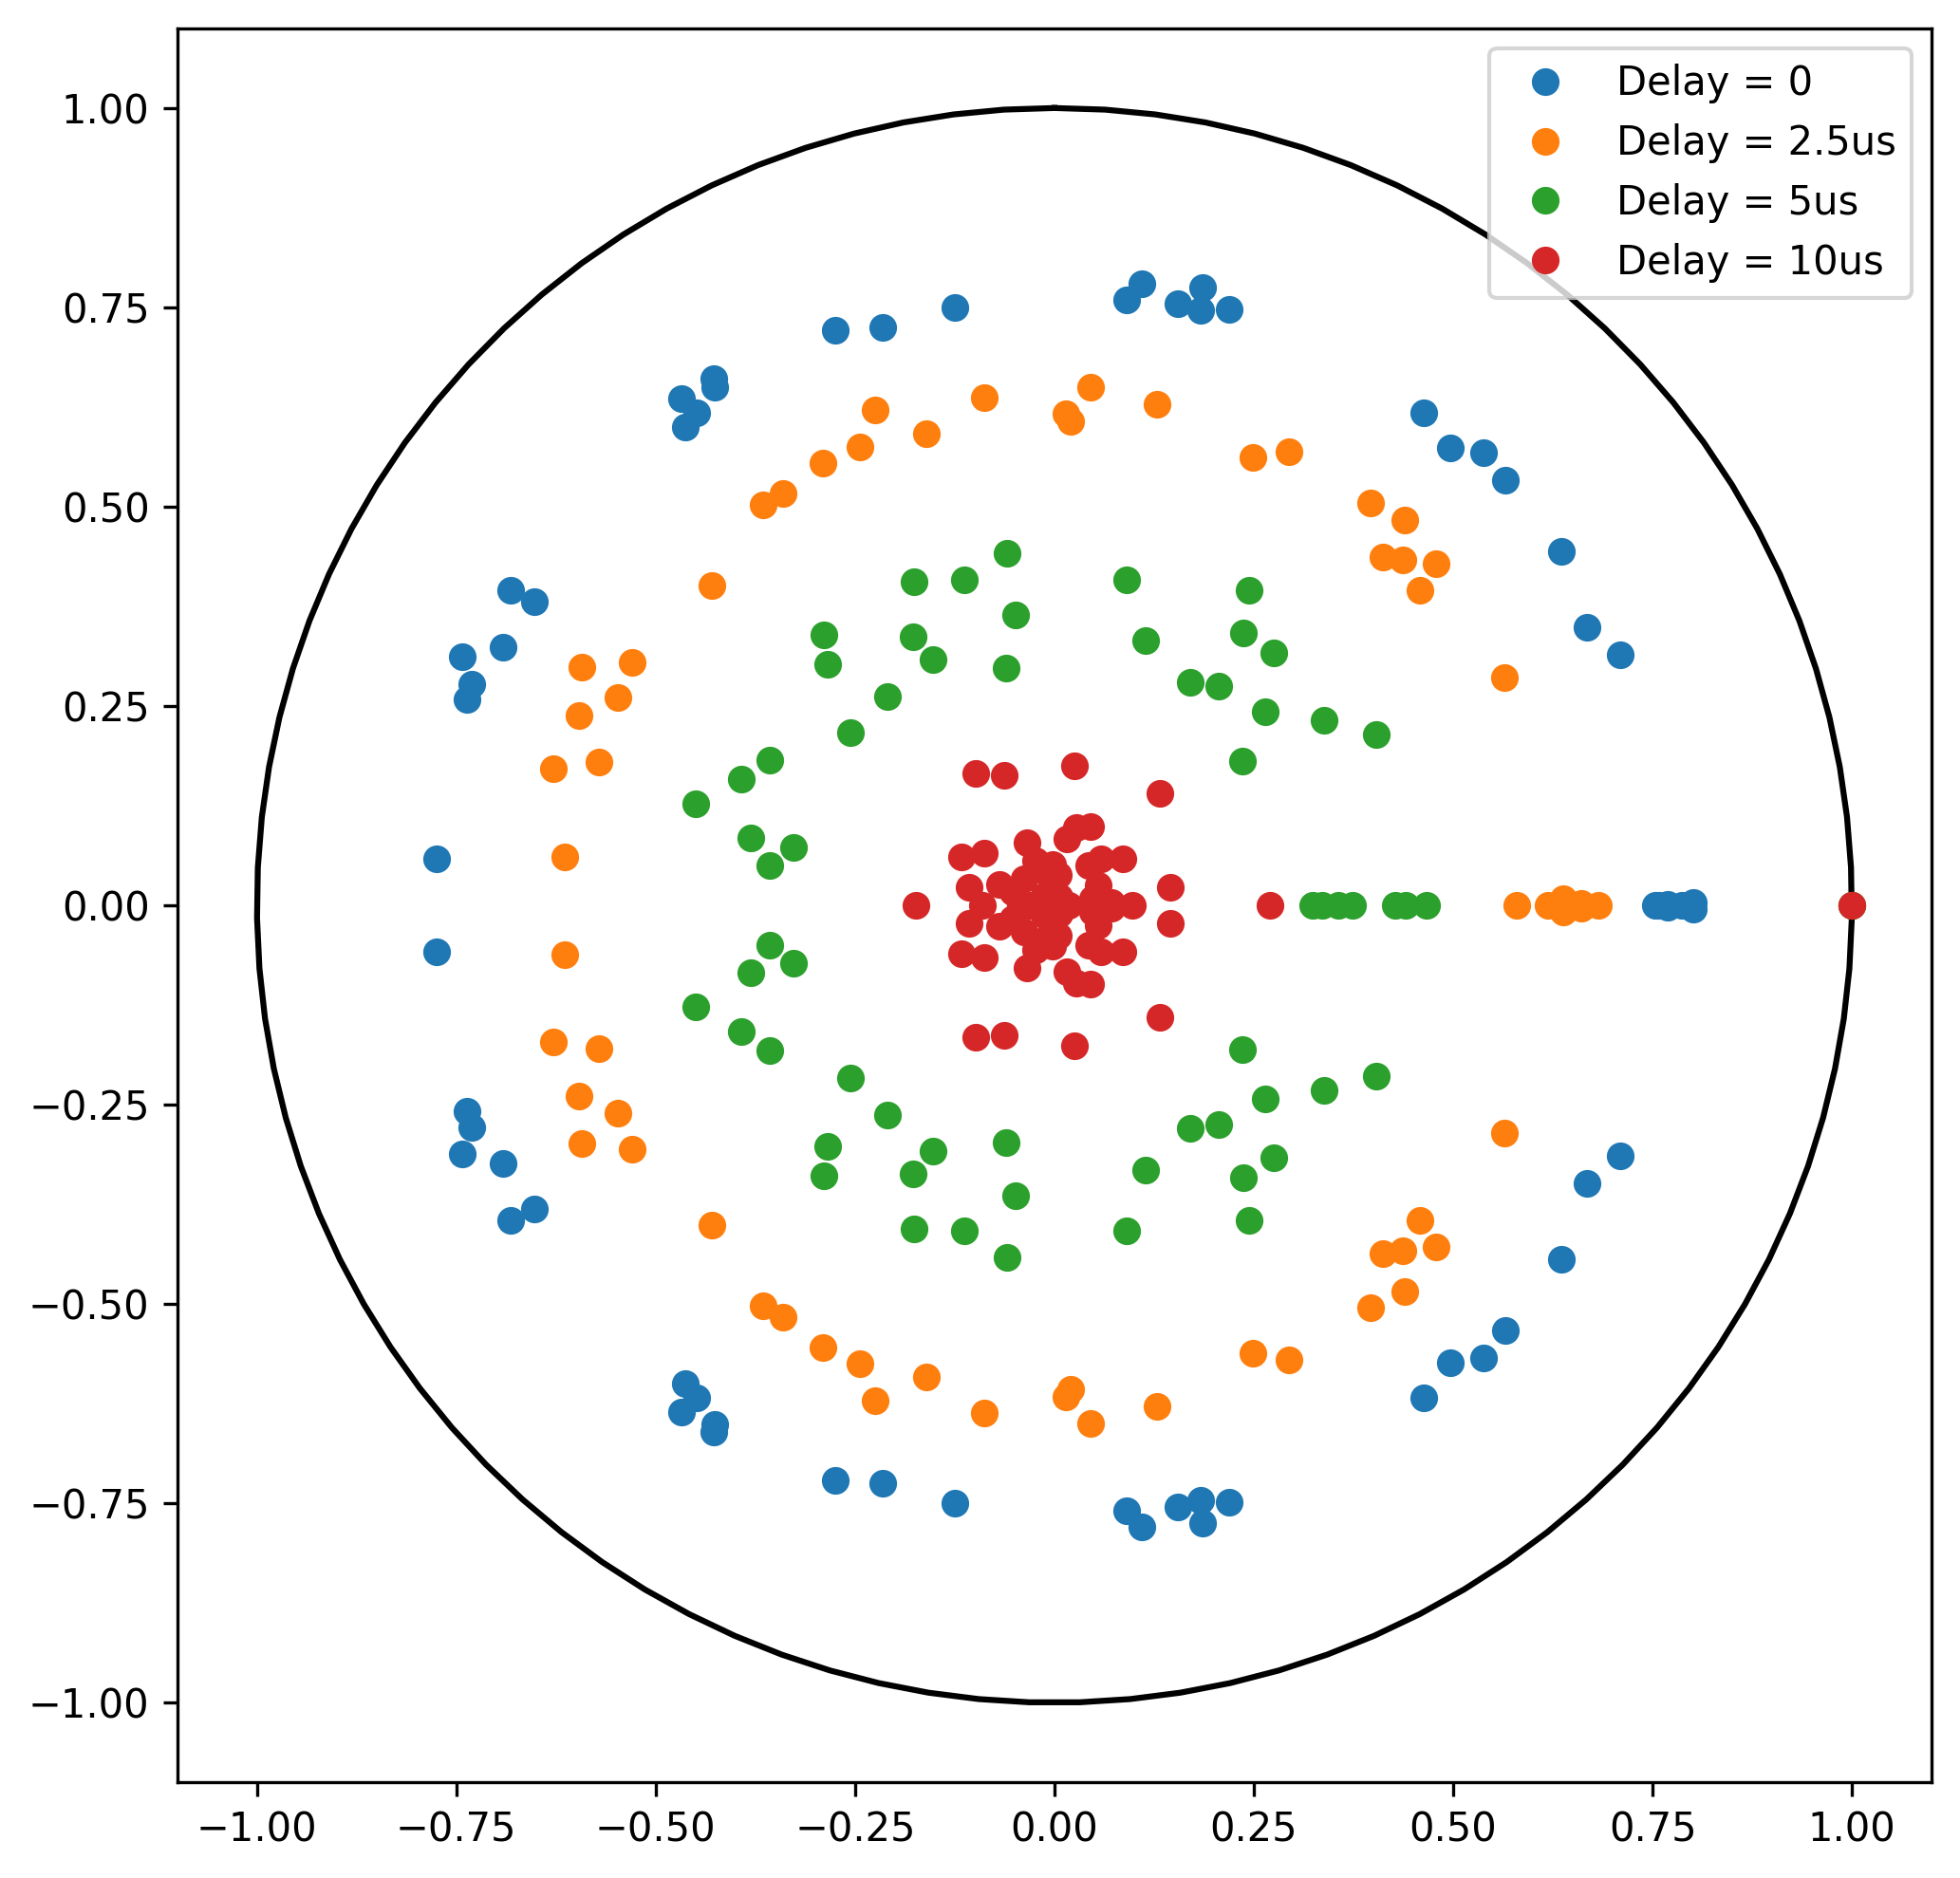

In [10]:
circle = np.array(circle)

fig =plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(spectrum1[:,0], spectrum1[:,1], "o")
plt.plot(spectrum2[:,0], spectrum2[:,1], "o")
plt.plot(spectrum3[:,0], spectrum3[:,1], "o")
plt.plot(spectrum4[:,0], spectrum4[:,1], "o")

#plt.plot(*0.66*circle, "k")
#plt.plot(*0.58*circle, "k")

#plt.plot(*0.25*circle, "k")

plt.legend(["_", "Delay = 0", "Delay = 2.5us", "Delay = 5us", "Delay = 10us"])
plt.show()

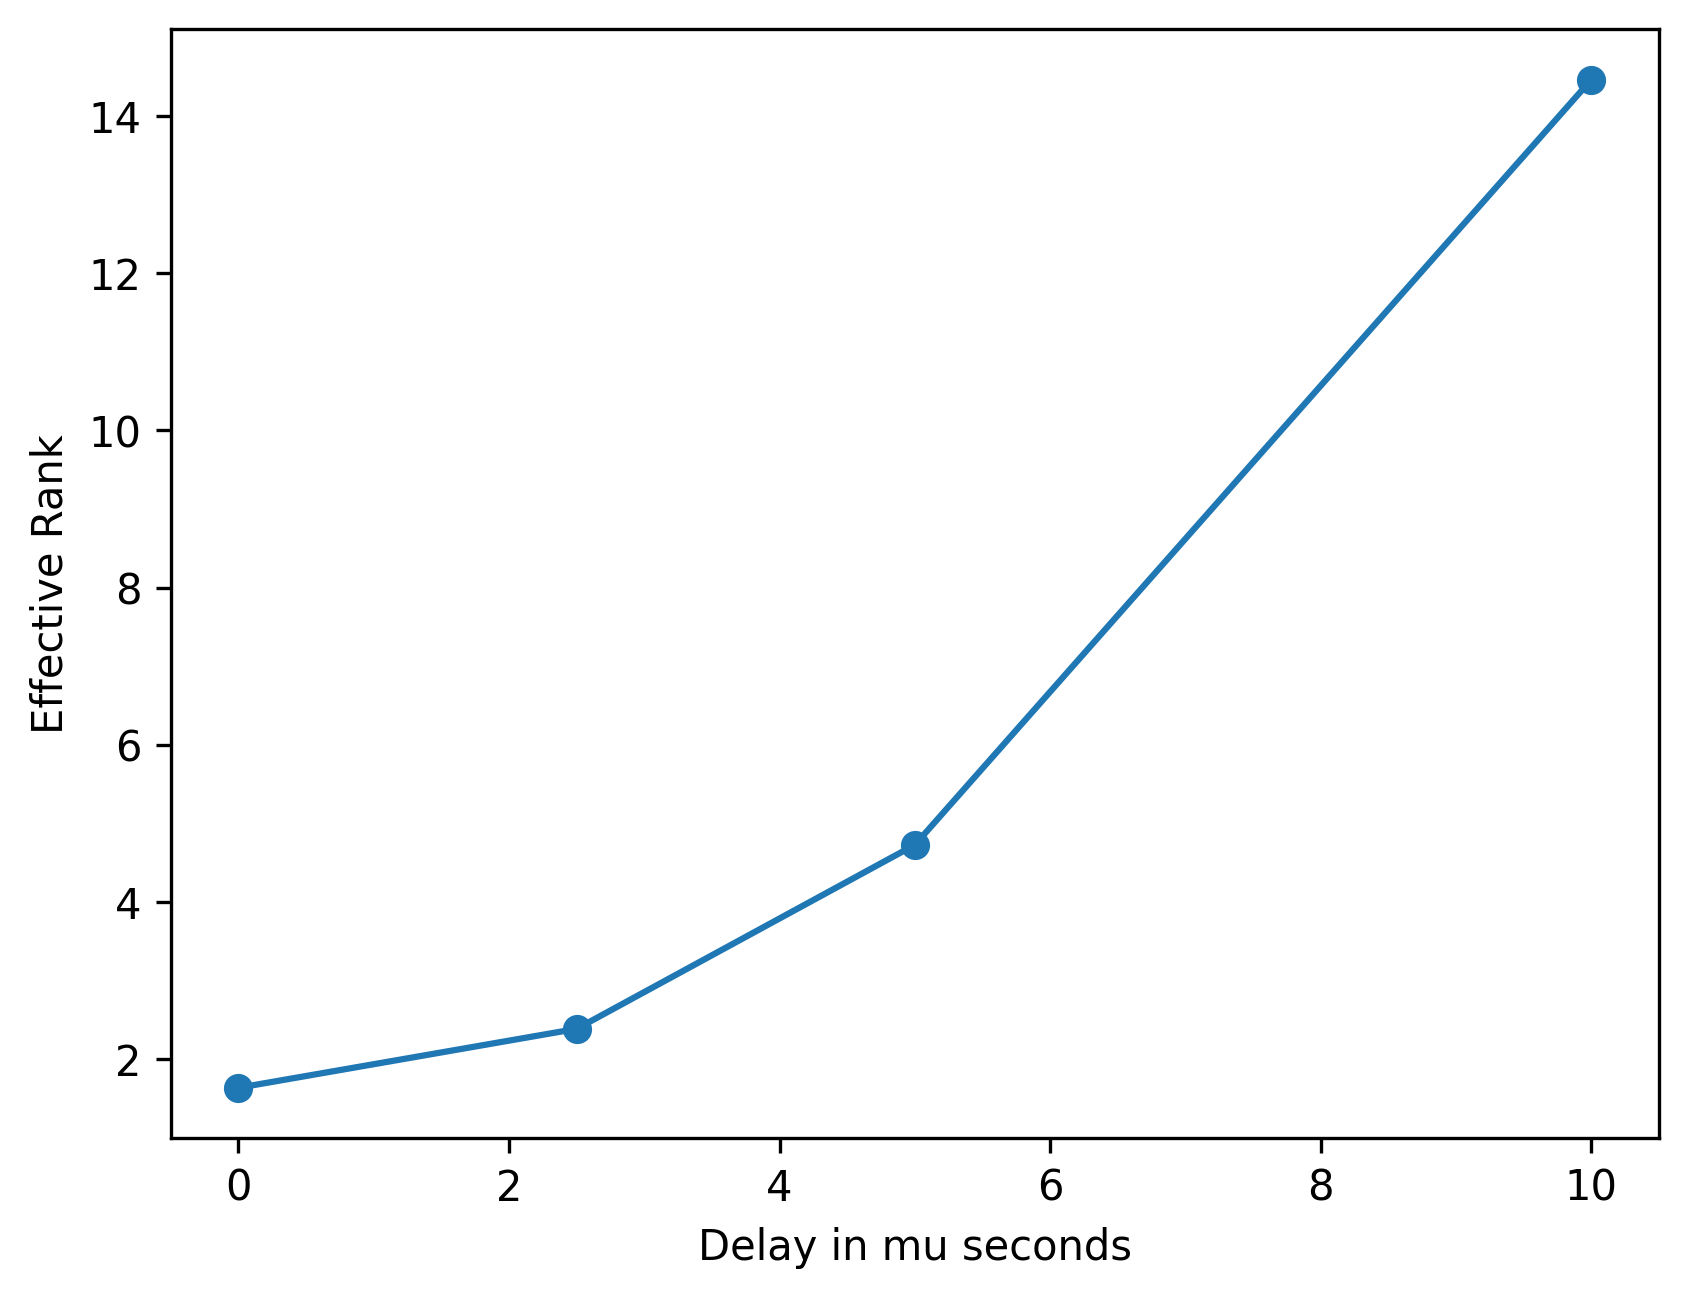

In [11]:
rank_eff_list = [effective_rank(model1.channel), effective_rank(model2.channel), effective_rank(model3.channel), effective_rank(model4.channel)]

fig=plt.figure(dpi = 300, facecolor='w', edgecolor='k')
plt.plot([0, 2.5, 5, 10], rank_eff_list, "o-")
plt.xlabel("Delay in mu seconds")
plt.ylabel("Effective Rank")
plt.show()

In [12]:
def spectrum_to_radial(spectrum):
    radial = tf.norm(spectrum, axis=1)
    return radial

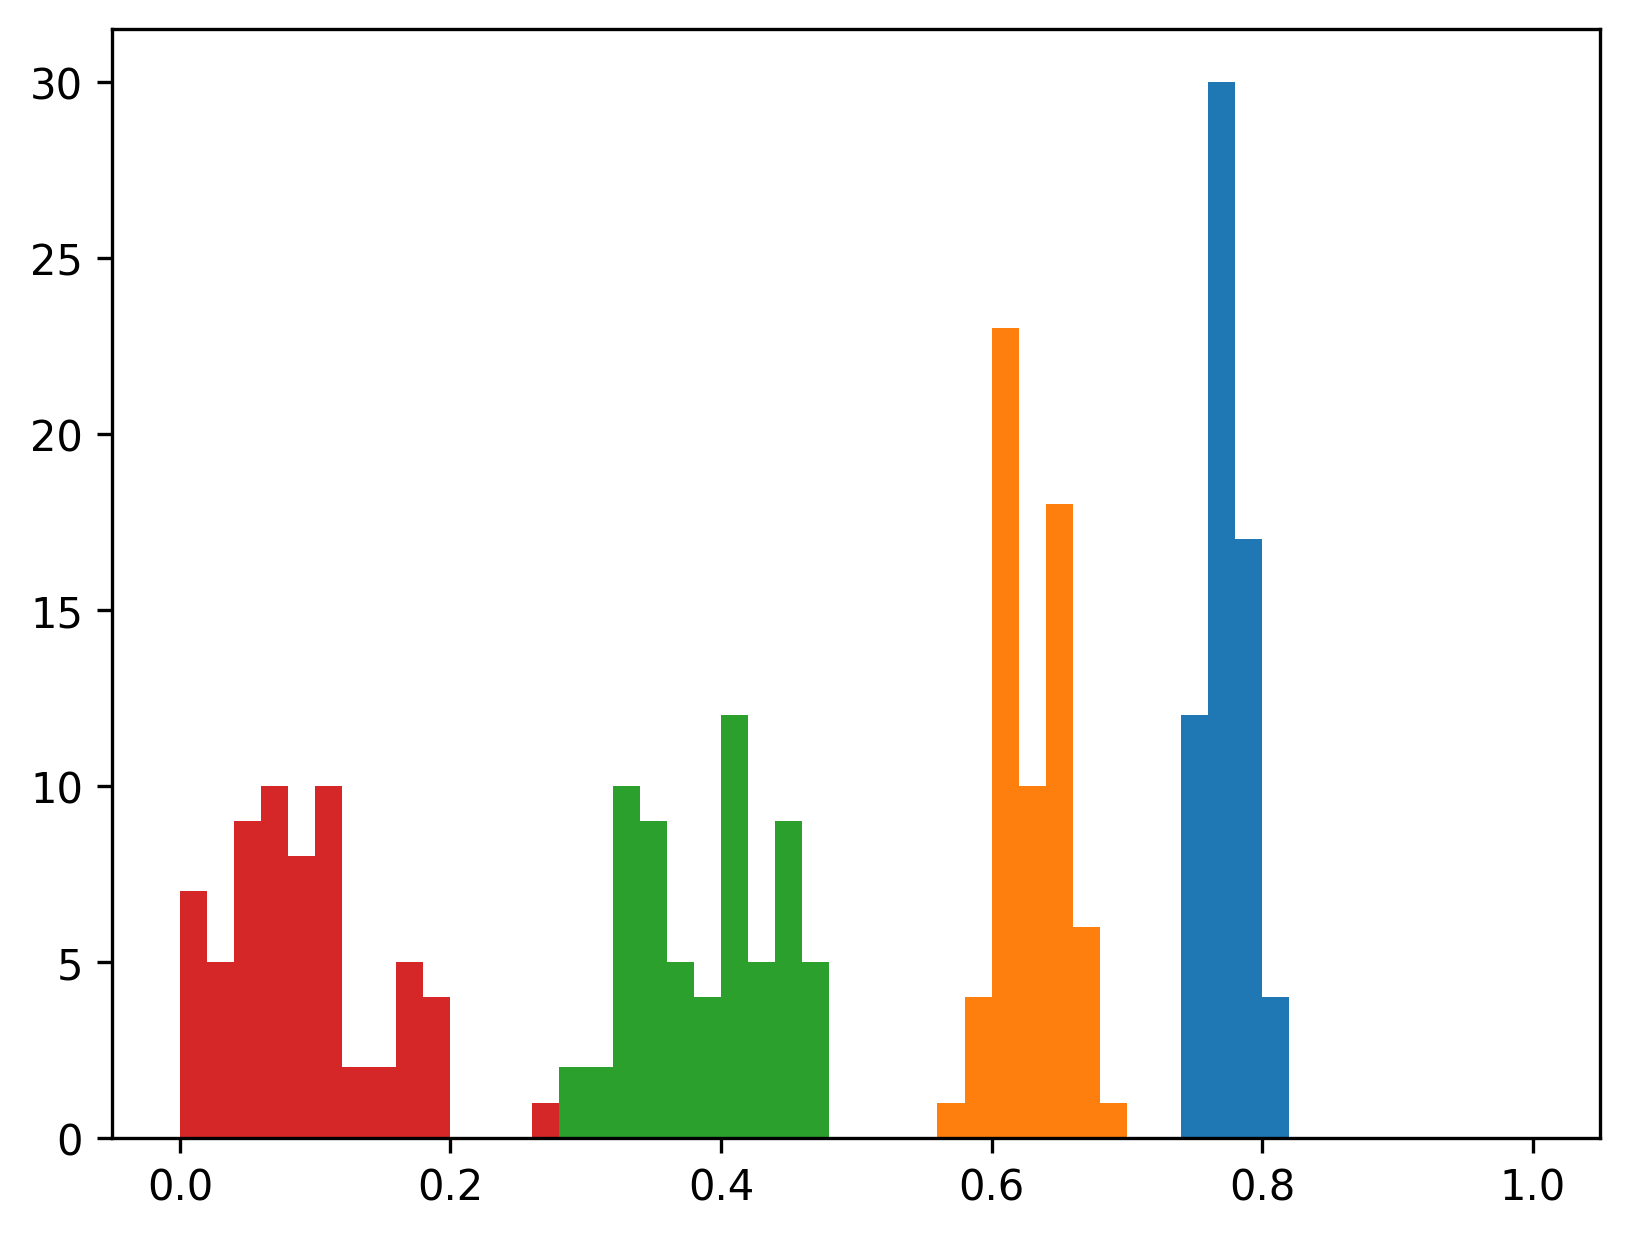

In [33]:
bins = np.linspace(0, 1, 51)

fig=plt.figure(dpi = 300, facecolor='w', edgecolor='k')
hist1 = plt.hist(spectrum_to_radial(spectrum1[:-1]), bins=bins)
hist2 = plt.hist(spectrum_to_radial(spectrum2[:-1]), bins=bins)
hist3 = plt.hist(spectrum_to_radial(spectrum3[:-1]), bins=bins)
hist4 = plt.hist(spectrum_to_radial(spectrum4[:-1]), bins=bins)
plt.show()

In [36]:
#print(hist1)
mask = np.where(hist1[0] != 0)
print(bins[mask])

[0.74 0.76 0.78 0.8 ]


In [37]:
#print(hist1)
mask = np.where(hist2[0] != 0)
print(bins[mask])

[0.56 0.58 0.6  0.62 0.64 0.66 0.68]


In [38]:
#print(hist1)
mask = np.where(hist3[0] != 0)
print(bins[mask])

[0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46]


In [39]:
#print(hist1)
mask = np.where(hist4[0] != 0)
print(bins[mask])

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.26]
